In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [23]:
DATA_PATH = "./data/"

# Europe Elects

Europe Elects is a poll aggregator from which we can download polling data in CSV format.

In this notebook, we demonstrate that we can load and use data the data from their database. We use polling data for Germany, but this process can be replicated for data from different countries.

In [24]:
# create dictionnaries for each country

it_parties = {
  'Partito Democratico': "PD (S&D)",
  'Più Europa': "+E (RE)",
  'Movimento 5 Stelle': "M5S (NI)",
  'Forza Italia': "FI (EPP)", 
  'Lega Nord': "LEGA (ID)",
  'Fratelli d’Italia': "FdI (ECR)"
}

de_parties = {
      "FDP": "FDP",
      "SPD": "SPD",
      "Union": "CDU/CSU",
      "Alternative für Deutschland": "AfD",
      "DIE LINKE": "DIE LINKE",
      "BÜNDNIS 90/DIE GRÜNEN": "GRÜNE"
}

nl_parties = {
      'Volkspartij voor Vrijheid en Democratie': 'VVD',
      'Partij voor de Vrijheid': 'PVV',
      'Christen-Democratisch Appèl': 'CDA',
      'Democraten 66': 'D66',
      'GroenLinks': 'GL', 
      'Socialistische Partij': 'SP',
      'Partij van de Arbeid': 'PvdA',
      'ChristenUnie': 'CU',
      'Partij voor de Dieren': 'PvdD',
      'Staatkundig Gereformeerde Partij': 'SGP',
      'Forum voor Democratie': 'FvD',
      'Juiste Antwoord 2021': 'JA21',
      'Volt Europa': 'Volt',
      'BoerBurgerBeweging': 'BBB'
}



fi_parties = {
  'Suomen Keskusta': 'Kesk', 
  'Kansallinen Kokoomus': 'Kok',
  'Perussuomalaiset': 'PS', 
  'Suomen Sosialidemokraattinen Puolue': 'SDP',
  'Vihreä liitto': 'Vihr', 
  'Vasemmistoliitto': 'Vas', 
  'Svenska folkpartiet i Finland': 'SFP',
  'Kristillisdemokraatit': 'KD', 
  'Sininen tulevaisuus': 'Sin', 
  'Liike Nyt': 'Liik',
}



se_parties = {
   'Sveriges socialdemokratiska arbetareparti': 'SSAP', 
   'Moderata samlingspartiet': 'MSP', 
   'Sverigedemokraterna': 'SD', 
   'Centerpartiet': 'CP',
   'Vänsterpartiet': 'VP', 
   'Kristdemokraterna': 'KD', 
   'Liberalerna': 'Liberalerna',
   'Miljöpartiet de gröna': 'MP'
}

fr_parties = {
  'Lutte Ouvrière': 'LO', 
  'Nouveau Parti anticapitaliste': 'NPA',
  'Parti communiste français': 'PCF',
  'La France insoumise': 'LFI',
  'Génération·s, le mouvement': 'GÉNÉRATION·S', 
  'Europe Écologie Les Verts': 'EÉLV',
  'Parti socialiste': 'PS', 
  'La République en marche–Mouvement démocrate': 'LREM',
  'Agir, la droite constructive–Union des démocrates et indépendants': 'AGIR',
  'Résistons!': 'RÉSISTONS!', 
  'Les Républicains': 'LR', 
  'Debout la France': 'DLF',
  'Rassemblement national': 'RN',
  'Les Patriotes': 'PATRIOTES',
  'Union populaire républicaine': 'UPR', 
  'Mouvement des gilets jaunes': 'GILETS JAUNES',
  'L’Engagement': 'ENGAGEMENT',
  'Reconquête': 'RECONQUÊTE',
  'Walwari': 'WALWARI',
}

dk_parties = {
  'Socialdemokraterne': 'SD', 
  'Dansk Folkeparti': 'DF', 
  'Venstre': 'Venstre',
  'Enhedslisten–De Rød-Grønne': 'EDRG', 
  'Liberal Alliance': 'LA', 
  'Alternativet': 'Alternativet',
  'Radikale Venstre': 'RV', 
  'Socialistisk Folkeparti': 'SF',
  'Det Konservative Folkeparti': 'Konservative', 
  'Kristendemokraterne': 'Kristendemokraterne', 
  'Nye Borgerlige': 'NB',
  'Borgerlisten': 'Borgerlisten', 
  'Stram Kurs': 'SK', 
  'Veganerlisten': 'Veganerlisten',
  'Moderaterne': 'Moderaterne',
  'Frie Grønne': 'FG', 
  'Danmarksdemokraterne': 'DD'
}





## Loading the raw data

In [25]:
# Read data removing any ill-formatted rows
# for all csv files in the data folder, load them into a pandas dataframe
countries = ["fr", "it", "nl", "se", "fi", "de", "dk"]
data_fr = pd.read_csv(DATA_PATH + "fr.csv", on_bad_lines="skip")
data_it = pd.read_csv(DATA_PATH + "it.csv", on_bad_lines="skip")
data_nl = pd.read_csv(DATA_PATH + "nl.csv", on_bad_lines="skip")
data_se = pd.read_csv(DATA_PATH + "se.csv", on_bad_lines="skip")
data_fi = pd.read_csv(DATA_PATH + "fi.csv", on_bad_lines="skip")
data_de = pd.read_csv(DATA_PATH + "de.csv", on_bad_lines="skip")
data_dk = pd.read_csv(DATA_PATH + "dk.csv", on_bad_lines="skip")



df_countries = [data_fr, data_it, data_nl, data_se, data_fi, data_de, data_dk]


In [26]:
#
# create dataframe with countries being rows
# and columns being the number of polls for each country

for i, df_country in enumerate(df_countries):
    # compute nb_polls_country for each country
    print(f"Number of polls for {countries[i]}: {len(df_country)}")



Number of polls for fr: 447
Number of polls for it: 1502
Number of polls for nl: 398
Number of polls for se: 323
Number of polls for fi: 134
Number of polls for de: 3029
Number of polls for dk: 398


In [27]:
# Create a new column with the end date of the surveys

for i, df_country in enumerate(df_countries):
    df_country['date'] = pd.to_datetime(df_country['Fieldwork End']).dt.to_period('M')


## Cleaning the dataframe 

In [28]:
for i, df_country in enumerate(df_countries):
    # keep only columns that are in dictionary parties_fr and map them to the new names


    party_dict = eval(countries[i] + '_parties')
    # only keep data and sample size column of df_country:

    df_countries[i] = df_countries[i][['date', 'Sample Size'] + list(party_dict.keys())]
    df_countries[i].columns = ['date', 'Sample Size'] + list(party_dict.values())
    df_countries[i] = df_countries[i][df_countries[i]["date"] >= "2019-01"]

df_countries[0].head()

,date,Sample Size,LO,NPA,PCF,LFI,GÉNÉRATION·S,EÉLV,PS,LREM,...,RÉSISTONS!,LR,DLF,RN,PATRIOTES,UPR,GILETS JAUNES,ENGAGEMENT,RECONQUÊTE,WALWARI
0,2022-04,2048,1%,Not Available,3%,19%,Not Available,8%,5%,24%,...,Not Available,8%,1%,23%,Not Available,Not Available,Not Available,Not Available,7%,Not Available
1,2022-04,1889,0.5%,1%,2.5%,18%,Not Available,4.5%,2%,27%,...,2%,8%,2%,24%,Not Available,Not Available,Not Available,Not Available,8.5%,Not Available
2,2022-04,1691,0.5%,1%,2.5%,17.5%,Not Available,4%,2%,26%,...,2.5%,8%,2.5%,25%,Not Available,Not Available,Not Available,Not Available,8.5%,Not Available
3,2022-04,1709,0.5%,1%,3%,16.5%,Not Available,5%,2.5%,26.5%,...,2%,8.5%,2.5%,23%,Not Available,Not Available,Not Available,Not Available,9%,Not Available
4,2022-04,3097,0.5%,1%,2.5%,18%,Not Available,4%,2%,26%,...,3%,9%,3%,21%,Not Available,Not Available,Not Available,Not Available,9.5%,Not Available


We still need to handle rows with missing values, and convert the percentages into values between 0 and 1.

In [29]:
# Convert values to numeric values, setting invalid values to NaN
for i, df_country in enumerate(df_countries):
    df_countries[i]["Sample Size"] = pd.to_numeric(df_countries[i]["Sample Size"], errors="coerce")


In [30]:
for i, df_country in enumerate(df_countries):

    parties = list(eval(countries[i] + '_parties').values())
    for party in parties:

        df_countries[i][party] = ( 
            pd.to_numeric(df_country[party].replace("%", "", regex=True), errors="coerce") / 100
        )

    # Fill NaN values with the mean of each column
    df_countries[i][["Sample Size"] + parties] = df_countries[i][["Sample Size"] + parties].fillna(
        df_countries[i][["Sample Size"] + parties].mean()
    )

    # Sort by date
    df_countries[i] = df_countries[i].sort_values("date").reset_index(drop=True)




# Replace percentages in string format with numeric values
# for party in parties:
#     data[party] = (
#         pd.to_numeric(data[party].replace("%", "", regex=True), errors="coerce") / 100
#     )

# # Fill NaN values with the mean of each column
# data[["Sample size"] + parties] = data[["Sample size"] + parties].fillna(
#     data[["Sample size"] + parties].mean()
# )

# Sort by date
#data = data.sort_values("Date").reset_index(drop=True)

df_countries[2].head()

,date,Sample Size,VVD,PVV,CDA,D66,GL,SP,PvdA,CU,PvdD,SGP,FvD,JA21,Volt,BBB
0,2019-01,953,0.280,0.170,0.160,0.150,0.190,0.120,0.100,0.070,0.050,0.030,0.120,0.057611,0.043168,0.0666
1,2019-01,1002,0.175,0.131,0.091,0.085,0.114,0.082,0.057,0.047,0.049,0.024,0.078,0.057611,0.043168,0.0666
2,2019-01,3000,0.220,0.180,0.100,0.100,0.170,0.130,0.150,0.060,0.080,0.030,0.170,0.057611,0.043168,0.0666
3,2019-01,3000,0.220,0.180,0.110,0.100,0.170,0.120,0.150,0.070,0.080,0.030,0.160,0.057611,0.043168,0.0666
4,2019-01,3000,0.220,0.180,0.100,0.100,0.170,0.130,0.150,0.060,0.080,0.030,0.170,0.057611,0.043168,0.0666


## Group polls by month

We group the polls by month and compute the mean and standard deviation according to the sample size in each group for all parties.

In [31]:
# Calculate the mean of a party with respect to the sample size
def calculate_mean(col, sample_size):
    return (col * sample_size).sum() / sample_size.sum()


# Calculate the standard deviation with respect to the sample size
def calculate_std(col, sample_size):
    return (
        (sample_size * (col - calculate_mean(col, sample_size)) ** 2).sum()
        / sample_size.sum()
    ) ** 0.5

In [32]:
for i, df_country in enumerate(df_countries):


    parties = list(eval(countries[i] + '_parties').values())
    groups = df_countries[i].groupby("date")
    avg = groups.apply(
        lambda x: pd.Series(
            {
                # i want to calculate the mean and std for each party
                'avg_' + party: calculate_mean(x[party], x["Sample Size"])
                for party in parties
            }
        )
    )


    std = groups.apply(
        lambda x: pd.Series(
            {
                # i want to calculate the mean and std for each party
                'std_' + party: calculate_std(x[party], x["Sample Size"])
                for party in parties
            }
        )
    )

    df_countries[i] = pd.concat([avg, std], axis=1)

        
df_countries[0].head()

,avg_LO,avg_NPA,avg_PCF,avg_LFI,avg_GÉNÉRATION·S,avg_EÉLV,avg_PS,avg_LREM,avg_AGIR,avg_RÉSISTONS!,...,std_RÉSISTONS!,std_LR,std_DLF,std_RN,std_PATRIOTES,std_UPR,std_GILETS JAUNES,std_ENGAGEMENT,std_RECONQUÊTE,std_WALWARI
date,,,,,,,,,,,,,,,,,,,,,
2019-01,0.008245,0.009705,0.021247,0.087748,0.030916,0.078929,0.055011,0.216832,0.031247,0.019149,...,0.006256,0.009650,0.009814,0.006541,0.002499,0.001947,0.000000,0.000000e+00,0.0,0.000000e+00
2019-02,0.008014,0.010521,0.021605,0.080073,0.046854,0.083241,0.055426,0.228728,0.023659,0.018032,...,0.002891,0.011426,0.005230,0.008715,0.001540,0.002241,0.003876,0.000000e+00,0.0,6.938894e-18
2019-03,0.007662,0.008302,0.020693,0.077686,0.032261,0.079582,0.057199,0.232076,0.020034,0.012449,...,0.003845,0.007977,0.005748,0.007212,0.005190,0.002770,0.010780,3.469447e-18,0.0,6.938894e-18
2019-04,0.010380,0.009571,0.024625,0.081764,0.033765,0.082062,0.057440,0.226472,0.020462,0.012733,...,0.004703,0.005920,0.005366,0.008953,0.005564,0.003420,0.005577,0.000000e+00,0.0,0.000000e+00
2019-05,0.009989,0.009304,0.027628,0.085025,0.025145,0.077495,0.053472,0.226193,0.016103,0.015529,...,0.000082,0.007381,0.005128,0.011179,0.006291,0.002308,0.005756,0.000000e+00,0.0,0.000000e+00


## Ploting polling data during COVID

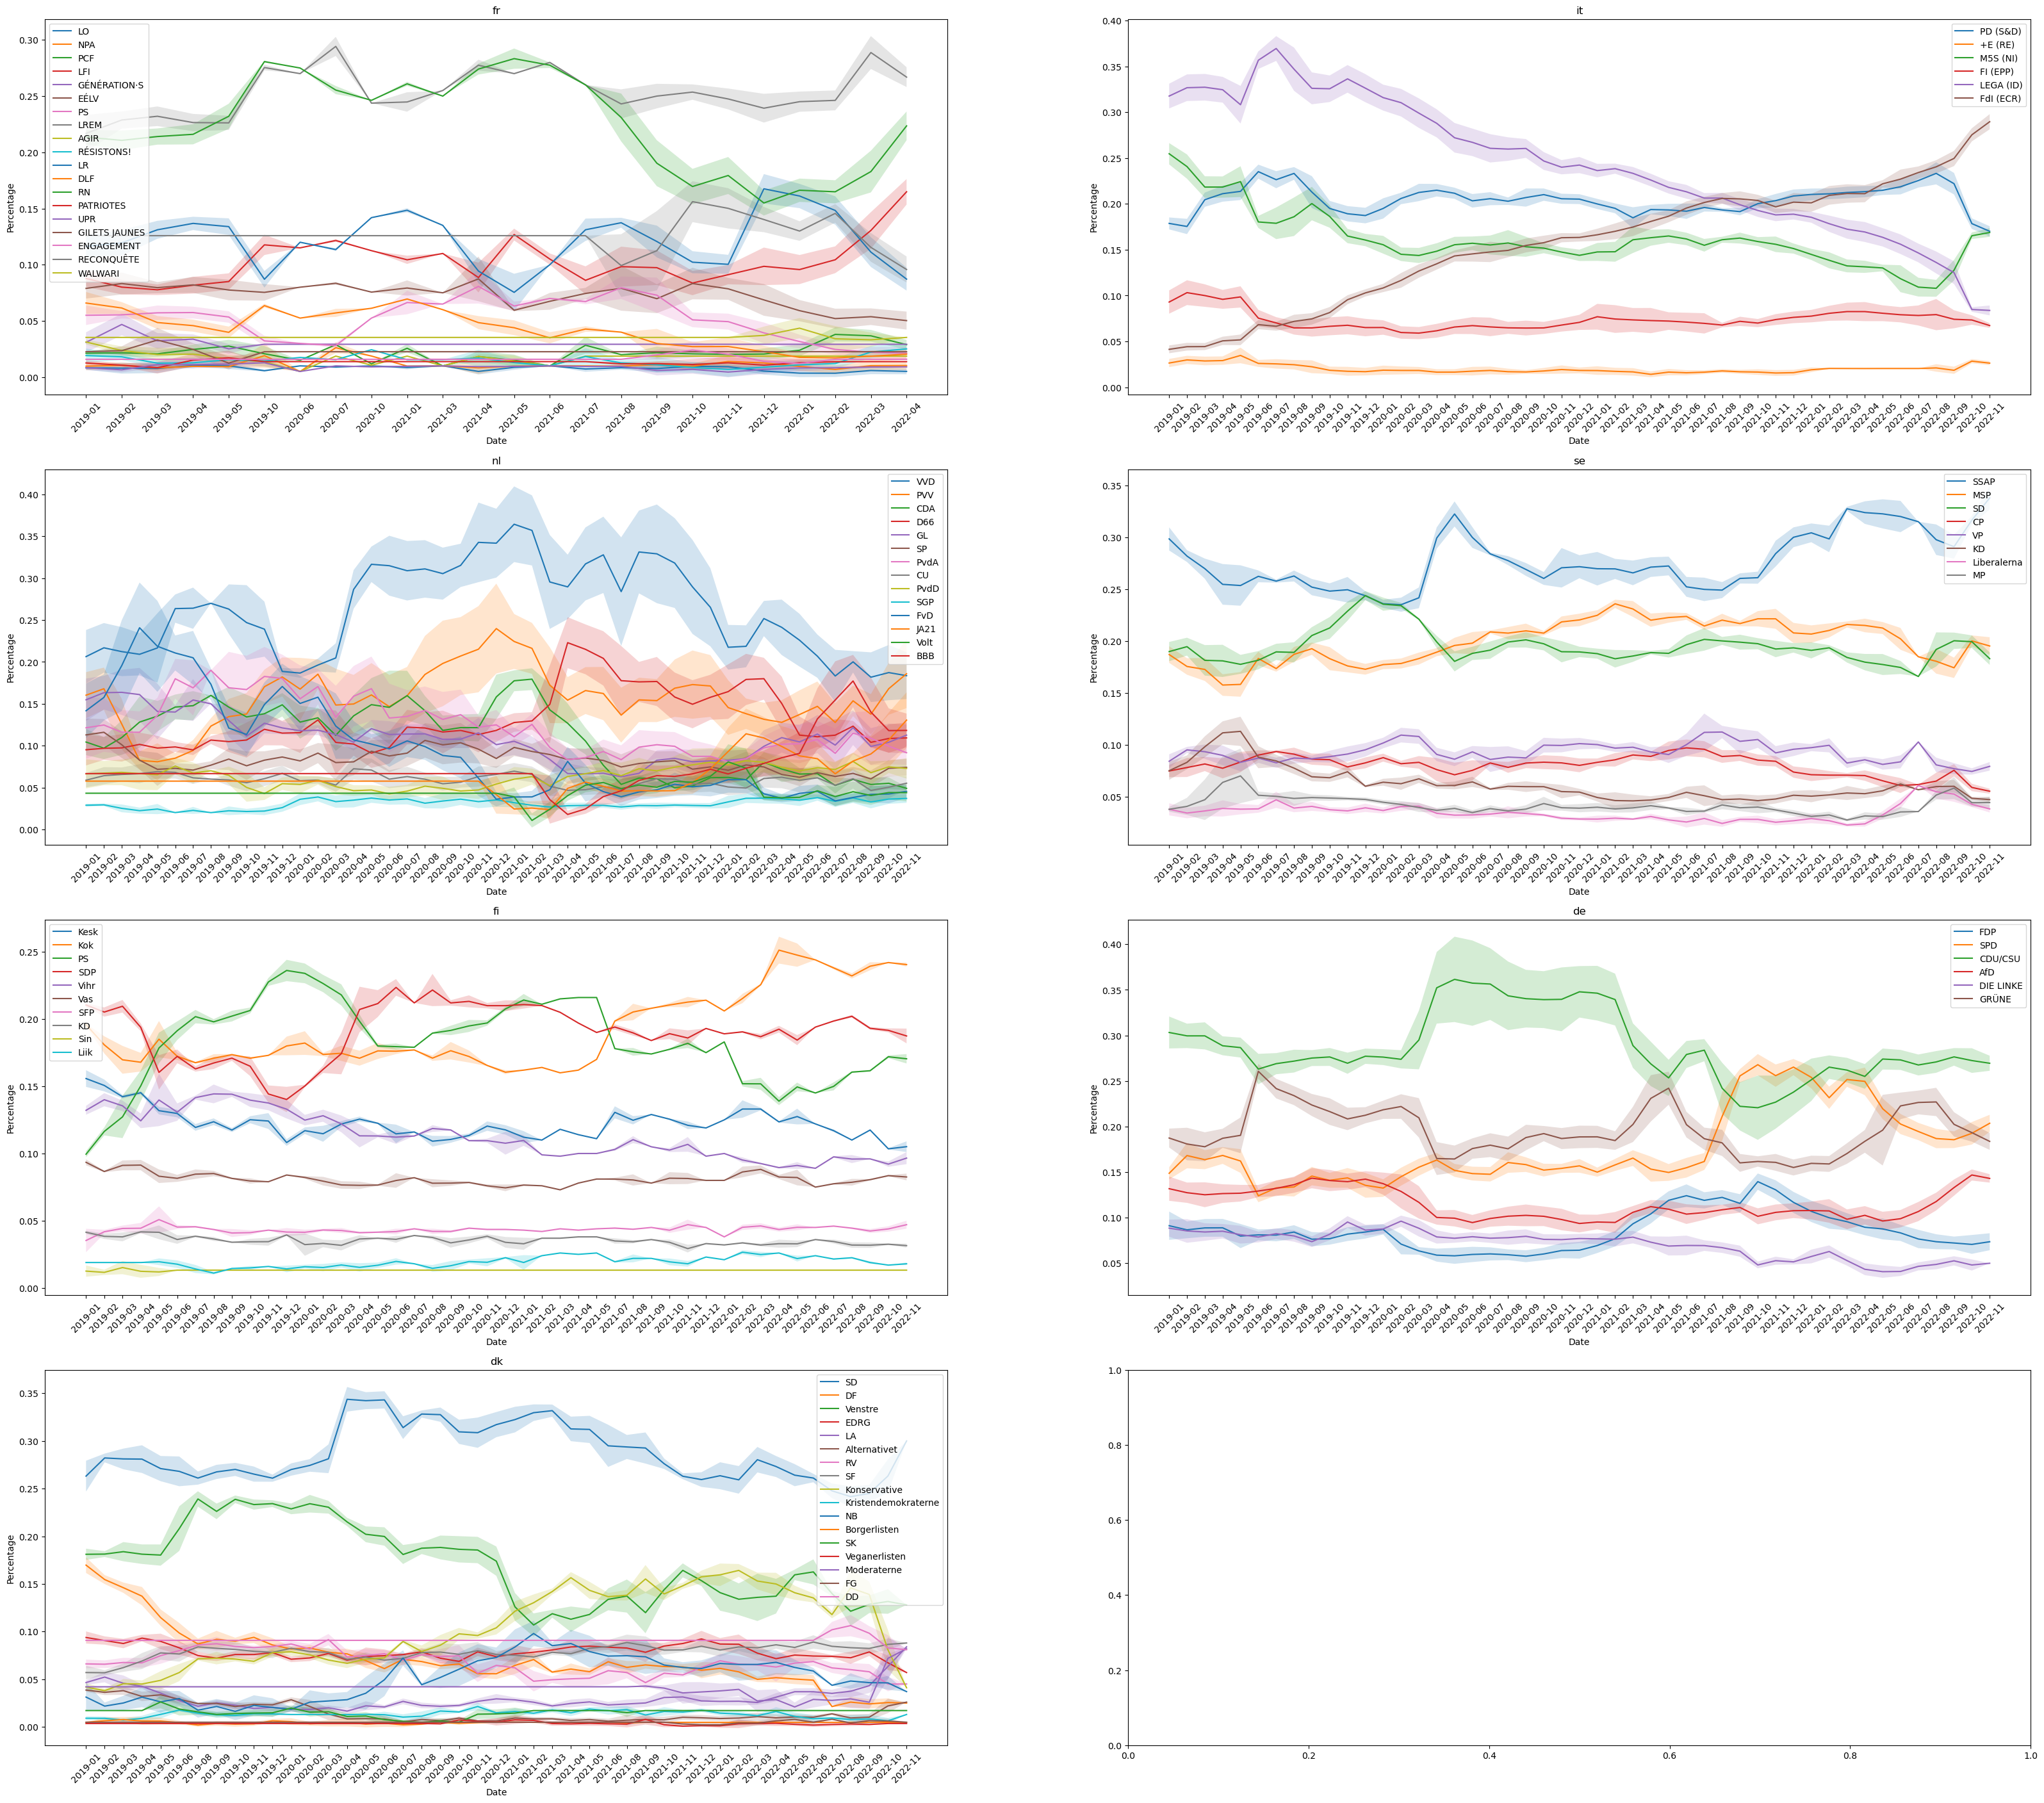

In [33]:
# create figure to represent each country
fig, ax = plt.subplots(4, 2, figsize=(40, 35))

for i, df_country in enumerate(df_countries):

    idx = df_countries[i].index.map(lambda x: x.strftime("%Y-%m"))
    parties = list(eval(countries[i] + '_parties').values())
    for party in parties:
        ax[i // 2, i % 2].fill_between(
            idx,
            df_countries[i]["avg_" + party] - df_countries[i]["std_" + party],
            df_countries[i]["avg_" + party] + df_countries[i]["std_" + party],
            alpha=0.2,
        )
        ax[i // 2, i % 2].plot(idx, df_countries[i]["avg_" + party], label=party)

    ax[i // 2, i % 2].set_title(countries[i])
    ax[i // 2, i % 2].set_xlabel("Date")
    ax[i // 2, i % 2].set_ylabel("Percentage")
    ax[i // 2, i % 2].legend()
    ax[i//2, i%2].tick_params(axis='x', rotation=45)

    
plt.show()



# PolitPro

As Europe Elects only collects polling data for countries in Europe, we cannot obtain polling data for Japan or South Korea from them.

PolitPro, another poll aggregator, does collect polling data for Japan. This data is not collected as regularly as with other European countries. As a result, the time series of the polling data is not as useful. However, we demonstrate that we are still able to use this data in case we need it.

In [59]:
data = np.genfromtxt(
    "./data/countries/Japan/JapanWithoutDateReverse.csv", delimiter=",", names=True
)

plt.figure()
for col in data.dtype.names:
    plt.plot(data[col], label=col)
plt.legend()
plt.show()

FileNotFoundError: ./data/countries/Japan/JapanWithoutDateReverse.csv not found.